<a href="https://colab.research.google.com/github/Ibrahimsyah/Foories/blob/ml/notebooks/01_Data_Collection_%26_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and Kaggle API

In [ ]:
!pip install kaggle -q
!pip install split-folders -q
!pip install python-resize-image -q

In [ ]:
# Kaggle API setup
!mkdir ~/.kaggle
!echo $(python3 -m base64 -d <<< "eyJ1c2VybmFtZSI6Im1hc25vcm1lbiIsImtleSI6IjE0YjJjNWUzNWM5NjU5OWExYzY2YWJkZDM0Mzg2YjAyIn0=") > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
from resizeimage import resizeimage
import splitfolders
import random

# Importing datasets

## Datasets from Kaggle

### Dataset 1:

https://www.kaggle.com/trolukovich/food11-image-dataset

Classes:
- dessert
- egg
- meat
- soup
- vegfruit (vegetables and fruits alike)

### Dataset 2:

https://www.kaggle.com/kmader/food41

Classes:
- fried_rice
- french_fries
- spaghetti
- hamburger
- pizza
- sushi

In [ ]:
# Download dataset 1:
!kaggle datasets download -d trolukovich/food11-image-dataset
# Download dataset 2:
!kaggle datasets download -d kmader/food41

 99% 1.07G/1.08G [00:10<00:00, 130MB/s]
100% 1.08G/1.08G [00:10<00:00, 114MB/s]
100% 5.29G/5.30G [01:22<00:00, 95.1MB/s]
100% 5.30G/5.30G [01:23<00:00, 68.5MB/s]


## Our own datasets

### Dataset 3:

Scraped with [AutoCrawler by YoongiKim](https://github.com/YoongiKim/AutoCrawler)

https://drive.google.com/drive/u/2/folders/1_ASv-TRummE6aYAUxceJ1A10M4p3gSPH

Data is scraped and collected from Google and Naver images, and then uploaded to our Google Drive storage.

Class:

- soto
- sate
- bakso

In [ ]:
# Download dataset 3:

# Bakso
!wget -q "https://drive.google.com/uc?export=download&id=15F7oPEYHss2EFgdGKs-iDeV8Q_GUzjLr" -O bakso.zip
# Soto
!wget -q "https://drive.google.com/uc?export=download&id=1l3bqZY1ptUmsSqJZ3Rstty-Y-6RyD6Bf" -O soto.zip
# Sate
!wget -q "https://drive.google.com/uc?export=download&id=1hsgV0bBpmpB_KVwdNEeCNeoqFPNzPyRD" -O sate.zip

# Extracting & splitting dataset

Split per class:

- Validation set: 125
- Test set: 125
- Training set: Rest of the data

In [ ]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/dev
!mkdir dataset/test

## Dataset 1 - Extraction & Cleaning

Dataset is already split.

In [ ]:
!unzip -j -q food11-image-dataset.zip "training/Dessert/*" -d "dataset/train/dessert"
!unzip -j -q food11-image-dataset.zip "training/Egg/*" -d "dataset/train/egg"
!unzip -j -q food11-image-dataset.zip "training/Meat/*" -d "dataset/train/meat"
!unzip -j -q food11-image-dataset.zip "training/Soup/*" -d "dataset/train/soup"
!unzip -j -q food11-image-dataset.zip "training/Vegetable-Fruit/*" -d "dataset/train/vegfruit"

replace dataset/train/dessert/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace dataset/train/egg/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace dataset/train/meat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace dataset/train/soup/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -j -q food11-image-dataset.zip "validation/Dessert/*" -d "dataset/dev/dessert"
!unzip -j -q food11-image-dataset.zip "validation/Egg/*" -d "dataset/dev/egg"
!unzip -j -q food11-image-dataset.zip "validation/Meat/*" -d "dataset/dev/meat"
!unzip -j -q food11-image-dataset.zip "validation/Soup/*" -d "dataset/dev/soup"
!unzip -j -q food11-image-dataset.zip "validation/Vegetable-Fruit/*" -d "dataset/dev/vegfruit"

In [ ]:
!unzip -j -q food11-image-dataset.zip "evaluation/Dessert/*" -d "dataset/test/dessert"
!unzip -j -q food11-image-dataset.zip "evaluation/Egg/*" -d "dataset/test/egg"
!unzip -j -q food11-image-dataset.zip "evaluation/Meat/*" -d "dataset/test/meat"
!unzip -j -q food11-image-dataset.zip "evaluation/Soup/*" -d "dataset/test/soup"
!unzip -j -q food11-image-dataset.zip "evaluation/Vegetable-Fruit/*" -d "dataset/test/vegfruit"

In [ ]:
# Delete unnecessary data

!ls -d dataset/train/dessert/* | tail -n +701 | xargs rm
!ls -d dataset/train/egg/* | tail -n +701 | xargs rm
!ls -d dataset/train/meat/* | tail -n +701 | xargs rm
!ls -d dataset/train/soup/* | tail -n +701 | xargs rm
!ls -d dataset/train/vegfruit/* | tail -n +701 | xargs rm

In [ ]:
!ls -d dataset/dev/dessert/* | tail -n +126 | xargs rm
!ls -d dataset/dev/egg/* | tail -n +126 | xargs rm
!ls -d dataset/dev/meat/* | tail -n +126 | xargs rm
!ls -d dataset/dev/soup/* | tail -n +126 | xargs rm
!ls -d dataset/dev/vegfruit/* | tail -n +126 | xargs rm

In [ ]:
!ls -d dataset/test/dessert/* | tail -n +126 | xargs rm
!ls -d dataset/test/egg/* | tail -n +126 | xargs rm
!ls -d dataset/test/meat/* | tail -n +126 | xargs rm
!ls -d dataset/test/soup/* | tail -n +126 | xargs rm
!ls -d dataset/test/vegfruit/* | tail -n +126 | xargs rm

## Dataset 2 & 3 - Extraction & Split

Datasets need to be split manually.

In [ ]:
!mkdir dirty_data

In [ ]:
# Dataset 2

!unzip -j -q food41.zip "images/fried_rice/*" -d "dirty_data/fried_rice"
!unzip -j -q food41.zip "images/french_fries/*" -d "dirty_data/french_fries"
!unzip -j -q food41.zip "images/hamburger/*" -d "dirty_data/hamburger"
!unzip -j -q food41.zip "images/pizza/*" -d "dirty_data/pizza"
!unzip -j -q food41.zip "images/spaghetti_carbonara/*" -d "dirty_data/spaghetti"
!unzip -j -q food41.zip "images/sushi/*" -d "dirty_data/sushi"

In [ ]:
# Dataset 3

!unzip -j -q bakso.zip "bakso/*" -d "dirty_data/bakso"
!unzip -j -q soto.zip "soto/*" -d "dirty_data/soto"
!unzip -j -q sate.zip "sate/*" -d "dirty_data/sate"

In [ ]:
# Splitting data into 125 each for dev and test. The remainder will be training

splitfolders.fixed("dirty_data", output="output_data", seed=42, fixed=(125, 125))
# splitfolders.ratio("dirty_data", output="output_data", seed=42, ratio=(.7, .15, .15), group_prefix=None)

Copying files: 9672 files [00:02, 4517.15 files/s]


In [ ]:
# Cleaning up folders

!mv output_data/train/* dataset/train/
!mv output_data/val/* dataset/dev/
!mv output_data/test/* dataset/test/
!rm -rf output_data
!rm -rf dirty_data

## Helper Functions

To show random images

In [ ]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

# Data Preparation: Resizing image

Resize image into 224 x 224 pixels

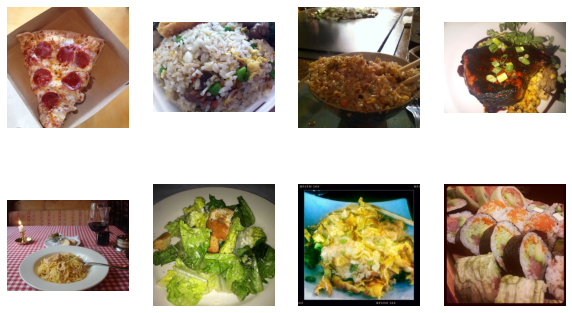

In [ ]:
# BEFORE

show_random_images_from("dataset/*/*/*", seed=420)

In [ ]:
for i, img in enumerate(glob("dataset/*/*/*")):
    try:
      image = Image.open(img)
      cover = resizeimage.resize_cover(image, [224, 224])
      cover.save(img)
    except:
      print(img, " ----- error converting, skipped.")

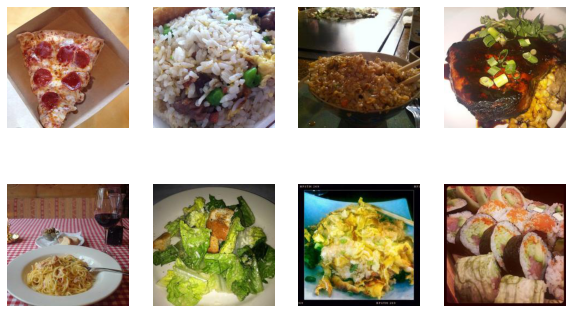

In [ ]:
# AFTER

show_random_images_from("dataset/*/*/*", seed=420)

# Save cleaned dataset to drive

Note: Add shortcut of the folder "Capstone Team B21-CAP0210" into "My Drive" first

In [ ]:
# Zipping dataset folder

!zip -r -q dataset_cleaned_v4.zip "/content/dataset/"

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Copy dataset to "cleaned" folder

!cp -r "dataset_cleaned_v4.zip" "drive/MyDrive/Capstone Team B21-CAP0210/Dataset/"

In [ ]:
!ls "drive/MyDrive/Capstone Team B21-CAP0210/Dataset/"

In [ ]:
# Flush data and unmount
drive.flush_and_unmount()